Conditional Node Graph

In [22]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [23]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    result: str

In [24]:
def add_number(state: AgentState) -> AgentState:
    output = state['number1'] + state['number2']
    state['result'] = f"The sum of {state['number1']} and {state['number2']} is {output}."
    return state

In [25]:
def subtract_number(state: AgentState) -> AgentState:
    output = state['number1'] - state['number2']
    state['result'] = f"The difference when {state['number2']} is subtracted from {state['number1']} is {output}."
    return state

In [26]:
def check_operation(state: AgentState) -> str:
    if state['operation'] == 'add':
        return 'add_operation'
    elif state['operation'] == 'subtract':
        return 'subtract_operation'
    else:
        raise ValueError("Unsupported operation. Please use 'add' or 'subtract'.")

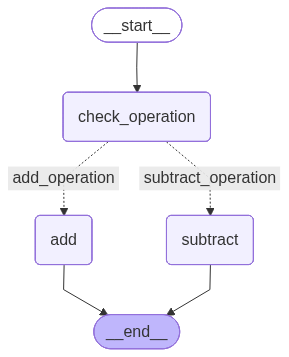

In [27]:
graph = StateGraph(AgentState)
graph.add_edge(START, 'check_operation')
graph.add_node('check_operation', lambda state: state)
graph.add_conditional_edges('check_operation', check_operation, {
    # Edge : Node
    'add_operation': 'add',
    'subtract_operation': 'subtract'
})
graph.add_node('add', add_number)
graph.add_node('subtract', subtract_number)
graph.add_edge('add', END)
graph.add_edge('subtract', END)
graph.compile(name='conditional_graph_example')

In [28]:
initial_state: AgentState = {
    'number1': 15,
    'operation': 'add',  # Change to 'subtract' to test subtraction
    'number2': 10,   
    'result': ''
}
app = graph.compile(name='conditional_graph_example')
final_state = app.invoke(initial_state)
print(final_state['result'])


The sum of 15 and 10 is 25.


#### Exercise Assignment

Make a graph with 2 conditional edges. Operation1 and Operation2 should perform sequentially

Input: initial_state=AgentState(number1=10, number2=20, operation1='+',
number3=5,operation2='-', number4=6, result1=0, result2=0)

In [1]:
from typing import TypedDict,List
from langgraph.graph import StateGraph,START,END


In [11]:
class AgentState(TypedDict):
    number1:int
    number2:int
    operation1: str
    number3: int
    number4:int
    operation2: str
    result1:int
    result2:int
    response1:str
    response2:str


In [12]:
def add_operation1(state:AgentState)->AgentState:
    state['result1'] = state['number1']+state['number2']
    state['response1']=f"Sum of {state['number1']} and {state['number2']} is {state['result1']}"
    return state

In [ ]:
def subtract_operation1(state:AgentState)->AgentState:
    state['result1']=state['number1']-state['number2']
    state['response1']=f"Subtract of {state['number1']} and {state['number2']} is {state['result1']}"
    return state

In [5]:
def check_operation(state:AgentState)->AgentState:
    if('add' in state['operation1']):
        return "add_operation"
    elif('sub' in state['operation1']):
        return "sub_opeation"
    else:
        return END

In [6]:
def add_operation2(state:AgentState)->AgentState:
    state['result2'] = state['number3']+state['number4']
    state['response2']=f"Sum of {state['number3']} and {state['number4']} is {state['result2']}"
    return state

In [21]:
def subtract_operation2(state:AgentState)->AgentState:
    state['result2']=state['number3']-state['number4']
    state['response2']=f"Subtract of {state['number3']} and {state['number4']} is {state['result2']}"
    return state

In [15]:
def check_operation2(state:AgentState)->AgentState:
    if("add" in state['operation2']):
        return "add_operation2"
    elif("sub" in state['operation2']):
        return "sub_operation2"

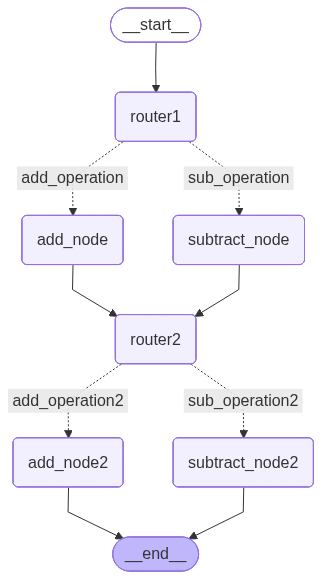

In [22]:
graph = StateGraph(AgentState)
graph.add_edge(START,"router1")
graph.add_node("router1", lambda state:state)
graph.add_conditional_edges("router1",check_operation,{
    'add_operation':"add_node",
    "sub_operation":"subtract_node"
})
graph.add_node("add_node",add_operation1)
graph.add_node("subtract_node",subtract_operation1)

graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")

graph.add_node("router2",lambda state:state)
graph.add_conditional_edges("router2",check_operation2,{
    "add_operation2":"add_node2",
    "sub_operation2":"subtract_node2"
})

graph.add_node("add_node2",add_operation2)
graph.add_node("subtract_node2",subtract_operation2)
graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)
graph.compile()

In [23]:
state = AgentState(
    number1=10,
    number2=5,
    operation1='add',
    number3=5,
    number4=4,
    operation2='sub'
)
app = graph.compile()
result = app.invoke(state)

result['response1']

'Sum of 10 and 5 is 15'

In [24]:
result['response2']

'Subtract of 5 and 4 is 1'